
# **Assignment 1: Stroke Prediction**

## **Objective:**
-  **The goal of this project is to walk you through a case study where you can apply the deep learning concepts that you learned about during the week. By the end of this project, you would have developed a solution that predicts if a person will have a stroke or not.**


## **Healthcare-dataset-stroke**


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

---------------------------------------------------------------

### **Importing the required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#The warnings module provides functions for controlling warnings,
#such as ignoring them or turning them into exceptions.
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
#used to configure the Matplotlib plotting library for inline
#plotting and to set the default figure size, respectively.

In [2]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the Dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/SDAIA/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### **Exploratory Data Analysis**



**Question 1:** How many examples and features do we have?

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(5110, 12)

### Types of different Columns

**Question 2:** Check the type of each feature.

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
#numerical variables
num = list(df.select_dtypes(include=['int64']).keys())
print(num)

['id', 'hypertension', 'heart_disease', 'stroke']


In [7]:
#categorical variables
cat = list(df.select_dtypes(include='O').keys())
print(cat)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [24]:
df.apply(pd.Series.nunique)

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

### **Dealing with categorical variables**

**Question 3:** Use the .value_counts() functions to walk through the categorical variables that we have to see the categories and the counts of each of them.

In [9]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [10]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [11]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [13]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [14]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [15]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [18]:
df['hypertension'].unique()

array([0, 1])

In [19]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [20]:
df['heart_disease'].unique()

array([1, 0])

In [21]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [22]:
df['stroke'].unique()

array([1, 0])

In [23]:
df ['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [25]:
#is there any dupilacted values?
if df.duplicated().any():
    print("yes")
else:
    print("No")

No


In [26]:
#is there any missing values?
if df.isnull().sum().any():
 print("yes")
else:
    print("No")

yes


In [27]:
#Number of null values for each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
#I need to determine the percentage of missing values in my data to decide whether dropping those features or imputing them
missingValues_Percentage= df.isnull().sum()*100/len(df)
missingValues_Percentage

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

# **Preprocessing**

### **Dealing with Nulls**

**Question 4:** The bmi column contains nulls. Fill it with the appropriate measure.


```
Using the mean to fill missing values is a common approach in data preprocessing when dealing with numerical data. By replacing missing values
 with the mean, you're essentially imputing the missing data with a central tendency value. This helps in retaining the overall distribution and
  statistical properties of the data while ensuring that the missing values don't interfere with subsequent analyses.
```



In [30]:
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)

In [31]:
#is there any missing values after imputing them?
if df.isnull().sum().any():
 print("yes")
else:
    print("No")

No


### **Encoding Categorical Features**

**Question 5:** Here you have to encode those categorical variables to be able to use them to train your DL model.



```
Label encoding is chosen here because the categorical variables being encoded are ordinal or nominal in nature and have no inherent order. Label
 encoding assigns a unique integer to each category in a categorical variable. This transformation allows algorithms to operate on the data, as
 most algorithms require numerical inputs.
 ```



In [33]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['gender'] = encoder.fit_transform(df['gender'])

In [37]:
print(df.head())

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  


### **Normalizing Features**

**Question 6:** Normalize the input data



```
Normalization is a common preprocessing step that can improve the stability, convergence, and interpretability of the model, particularly when
dealing with features with differing scales.

```



In [39]:
df = df.divide(df.max(axis=0))

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,0.500656,0.290125,0.000919,0.243231,0.506334,0.749685,1.0
gender,5110.0,0.207143,0.246522,0.000000,0.000000,0.000000,0.500000,1.0
age,5110.0,0.527154,0.275764,0.000976,0.304878,0.548780,0.743902,1.0
hypertension,5110.0,0.097456,0.296607,0.000000,0.000000,0.000000,0.000000,1.0
heart_disease,5110.0,0.054012,0.226063,0.000000,0.000000,0.000000,0.000000,1.0
ever_married,5110.0,0.656164,0.475034,0.000000,0.000000,1.000000,1.000000,1.0
work_type,5110.0,0.541928,0.272573,0.000000,0.500000,0.500000,0.750000,1.0
Residence_type,5110.0,0.508023,0.499985,0.000000,0.000000,1.000000,1.000000,1.0
avg_glucose_level,5110.0,0.390622,0.166643,0.202841,0.284261,0.338136,0.419850,1.0
bmi,5110.0,0.296037,0.078873,0.105533,0.243852,0.290984,0.336066,1.0


### **Removing Unnecessary Features**

**Question 7:** From the features that you have, remove the feature(s) that is(are) irrelevant to your predictions.

In [40]:
#doesn't contain useful information
#it's like an index
df = df.drop('id' , axis=1)

# **Building the DL Model**

**Question 8:** Now it's time to build the actual model, and observe a summary of it.

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 1065 (4.16 KB)
Trainable params: 1065 (4.1

### Compiling the model

**Question 9:**  Now we compile the model. Here we want to measure the accuracy as well as the precision and recall to know better about the performance of our model.

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

- **Adam is a popular optimization algorithm used for training neural networks. It is an adaptive learning rate optimization algorithm that combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp. Adam dynamically adjusts the learning rate during training, making it well-suited for a wide range of problems.**

- **Binary cross-entropy is a common loss function used in binary classification problems. It measures the difference between the true labels and the predicted probabilities for each class. In binary classification, where the output is either 0 or 1, binary cross-entropy is an appropriate choice for loss calculation.**




## **Fitting the model**

**Question 10:** Split the data and train the model

We take the first columns as features and the last column as a label, then we split our dataset between training (70%) and testing (30%).

In [43]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [44]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, stratify=y)

we fit the model on 80% training data, and validate on the rest. Later we will do the final test on the test data. The training happens for 15 epochs.

In [45]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
112/112 [==============================] - 2s 6ms/step - loss: 0.4209 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2248 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
112/112 [==============================] - 0s 4ms/step - loss: 0.2104 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2057 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
112/112 [==============================] - 0s 4ms/step - loss: 0.1940 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1897 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
112/112 [==============================] - 0s 4ms/step - loss: 0.1832 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1795 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
112/112 [====================

# **Improving DL Models**

**Question 11:** Suggest ways to improve your model

### Checking For Data Imbalance

We check for imbalance because we have a poor recall and precision.

<Axes: >

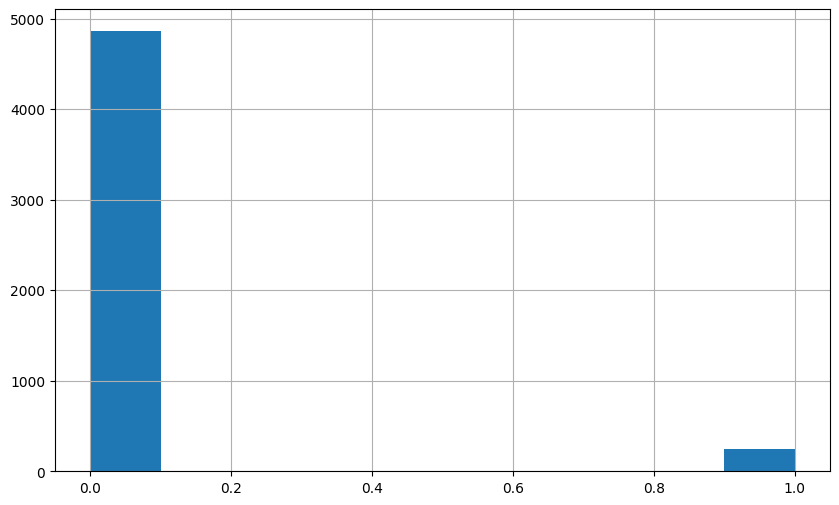

In [47]:
df['stroke'].hist()

We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

We will oversample this time using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

(array([4861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4861.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

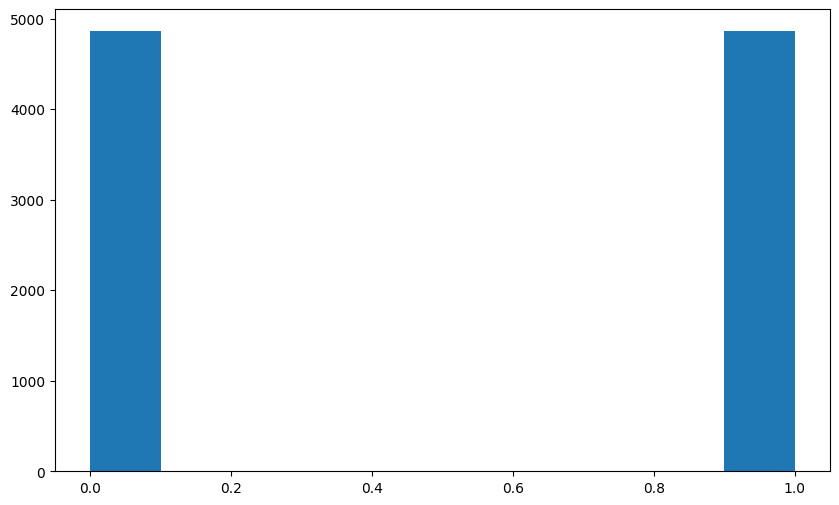

In [48]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


over = SMOTE()
x_new, y_new = over.fit_resample(x, y)

plt.hist([y_new])

Split the balanced dataset between 90% (training and validation), 10% testing
Then divide the 90% between 80% training and 20% validation

In [49]:
from sklearn.model_selection import train_test_split


x_train_val, x_test, y_train_val, y_test = train_test_split(x_new, y_new, test_size=0.1, stratify=y_new)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, stratify=y_train_val)

Now we will train the model on the balanced data, and tune it on the validation set

In [50]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
219/219 [==============================] - 1s 4ms/step - loss: 0.5642 - accuracy: 0.7178 - precision: 0.7731 - recall: 0.6165 - val_loss: 0.5062 - val_accuracy: 0.7931 - val_precision: 0.7562 - val_recall: 0.8651
Epoch 2/15
219/219 [==============================] - 1s 3ms/step - loss: 0.4988 - accuracy: 0.7917 - precision: 0.7537 - recall: 0.8665 - val_loss: 0.4774 - val_accuracy: 0.7977 - val_precision: 0.7527 - val_recall: 0.8869
Epoch 3/15
219/219 [==============================] - 1s 3ms/step - loss: 0.4773 - accuracy: 0.7914 - precision: 0.7475 - recall: 0.8800 - val_loss: 0.4623 - val_accuracy: 0.8017 - val_precision: 0.7495 - val_recall: 0.9063
Epoch 4/15
219/219 [==============================] - 1s 3ms/step - loss: 0.4618 - accuracy: 0.7985 - precision: 0.7536 - recall: 0.8871 - val_loss: 0.4565 - val_accuracy: 0.7931 - val_precision: 0.7791 - val_recall: 0.8183
Epoch 5/15
219/219 [==============================] - 1s 3ms/step - loss: 0.4509 - accuracy: 0.8025 - pr

Evaluate your model on the test set that you kept aside at the beginning.

In [51]:
model.evaluate(x_test, y_test)

31/31 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8222 - precision: 0.7698 - recall: 0.9199


[0.38023021817207336, 0.8221994042396545, 0.769759476184845, 0.9199178814888]

We see that the performance gets better when our data became balanced.
Now we will try improving our model with other techniques that we learned through the week.

### Model Design

We will introduce batch normalization after each layer and then train the model

In [52]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

history2 = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
219/219 [==============================] - 5s 8ms/step - loss: 0.5558 - accuracy: 0.7334 - precision: 0.7415 - recall: 0.7165 - val_loss: 0.5502 - val_accuracy: 0.7543 - val_precision: 0.6802 - val_recall: 0.9600
Epoch 2/15
219/219 [==============================] - 1s 4ms/step - loss: 0.4917 - accuracy: 0.7747 - precision: 0.7386 - recall: 0.8502 - val_loss: 0.4793 - val_accuracy: 0.7811 - val_precision: 0.7067 - val_recall: 0.9611
Epoch 3/15
219/219 [==============================] - 1s 4ms/step - loss: 0.4720 - accuracy: 0.7807 - precision: 0.7443 - recall: 0.8551 - val_loss: 0.4496 - val_accuracy: 0.7971 - val_precision: 0.7467 - val_recall: 0.8994
Epoch 4/15
219/219 [==============================] - 1s 4ms/step - loss: 0.4577 - accuracy: 0.7881 - precision: 0.7491 - recall: 0.8662 - val_loss: 0.4324 - val_accuracy: 0.8091 - val_precision: 0.7697 - val_recall: 0.8823
Epoch 5/15
219/219 [==============================] - 1s 4ms/step - loss: 0.4497 - accuracy: 0.7941 - pr

In [54]:
model.evaluate(x_test, y_test)

31/31 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8314 - precision: 0.7963 - recall: 0.8912


[0.3748675584793091,
 0.8314491510391235,
 0.7963302731513977,
 0.8911704421043396]

We see that we are achieving better metrics with batch normalization.